## Фильтры

In [1]:
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2 
import skimage
import scipy

from scipy import ndimage
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
img_name = 'mice.bmp'

### Фильтр Гаусса

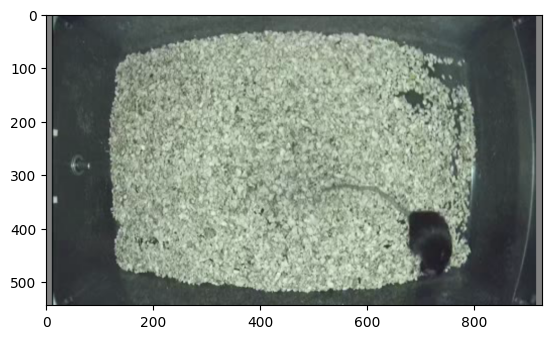

In [3]:
pic = PIL.Image.open(img_name)
sigma = 10
pix = np.array(pic)
result = ndimage.gaussian_filter(pix, sigma)
PIL_image = PIL.Image.fromarray(np.uint8(result)).convert('L')
plt.imshow(pic)
plt.show()

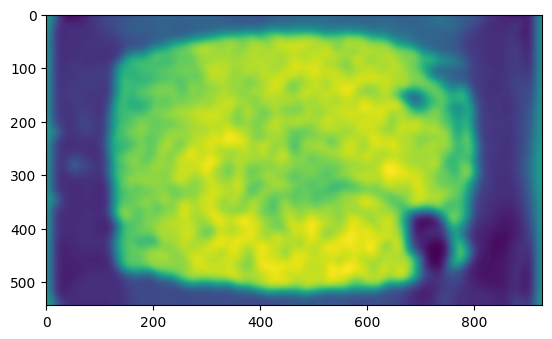

In [4]:
plt.imshow(PIL_image)
plt.show()

### Фильтр Робертса

('R', 'G', 'B')
('L',)


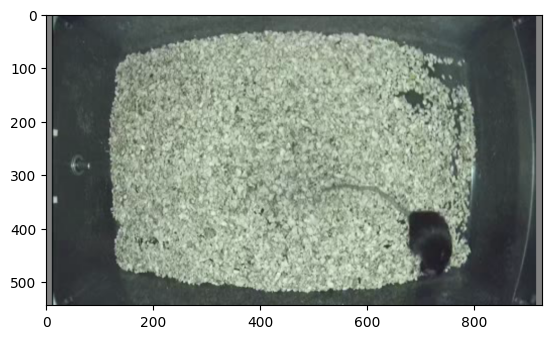

In [5]:
roberts_cross_v = np.array([[1, 0 ],
                            [0,-1 ]])
roberts_cross_h = np.array([[ 0, 1 ],
                            [ -1, 0 ]])

with PIL.Image.open(img_name) as pix:
    pix.load()
 
plt.imshow(pix)
b = pix.getbands()
print(b)

pix = pix.convert("L")
 
b = pix.getbands()
print(b)

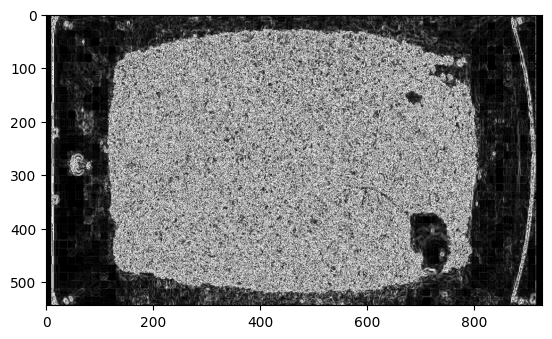

In [6]:
vertical = ndimage.convolve(pix, roberts_cross_v)
horizontal = ndimage.convolve(pix, roberts_cross_h)
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))

 
PIL_image = PIL.Image.fromarray(np.uint8(edged_img))

plt.imshow(PIL_image,cmap=plt.cm.gray)
plt.show()

### Фильтр Прюитт

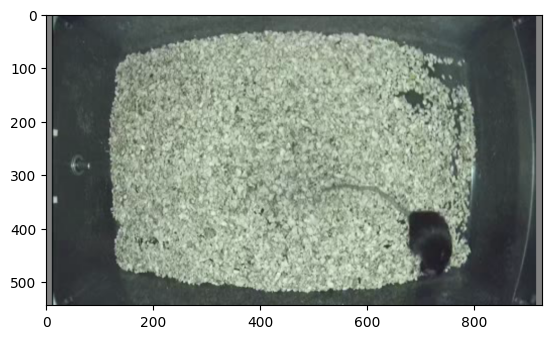

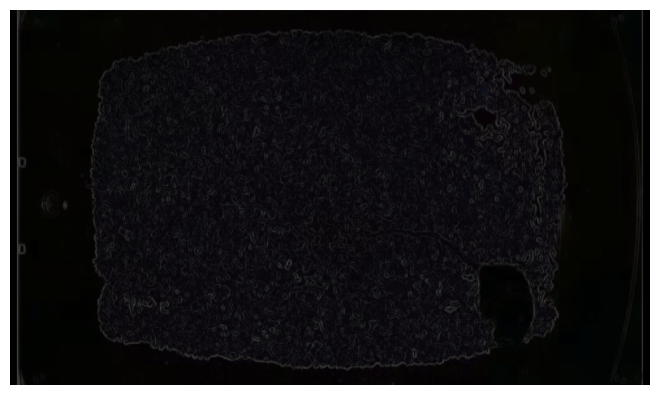

In [7]:
pic = PIL.Image.open(img_name)
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

plt.imshow(pic, cmap=plt.cm.gray, aspect='equal')
plt.show()

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result, cmap=plt.cm.gray, aspect='equal')
plt.show()

### Фильтр Собеля

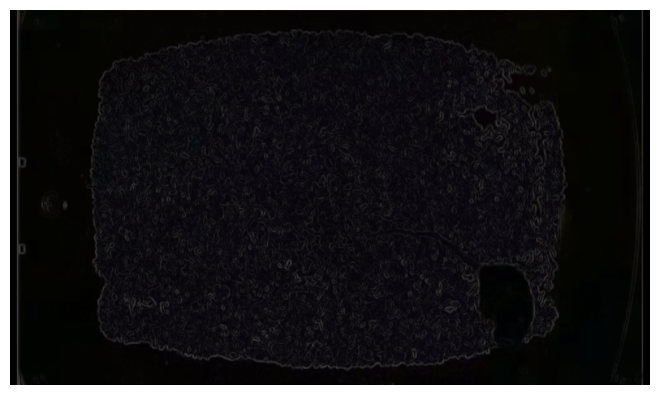

In [8]:
pic = PIL.Image.open(img_name)
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.sobel(pix)
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(result, cmap=plt.cm.gray, aspect='equal', interpolation="mitchell")
plt.show()

### Фильтр Лапласа

In [9]:
def LoG_filter(image, sigma, size=None):
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(- size // 2 + 1, size // 2 + 1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = ndimage.convolve(image, kernel)
    return result

image = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
sigma = 2.0
filtered_image = LoG_filter(image, sigma)

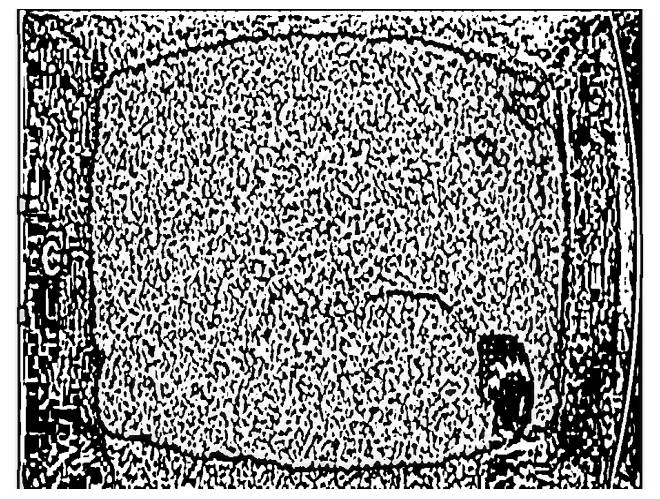

In [10]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(filtered_image, cmap=plt.cm.gray, aspect='auto')
plt.show()

### Выделение областей

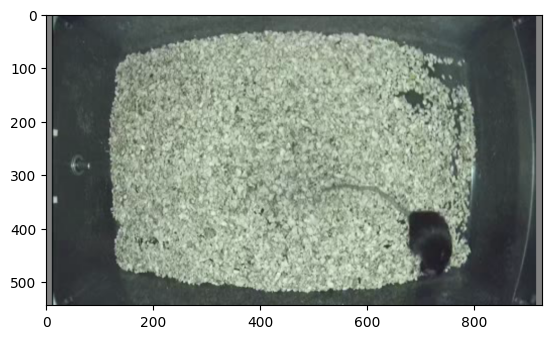

In [11]:
image = PIL.Image.open(img_name).convert('RGB')

plt.imshow(image, cmap=plt.cm.gray, aspect='equal')
plt.show()

img = np.array(image)
shape = img.shape
new_shape = shape[1], shape[0]
reshaped_image = np.reshape(image, [-1, 3])
bandwidth = estimate_bandwidth(reshaped_image, quantile=0.1, n_samples=300)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshaped_image)

labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

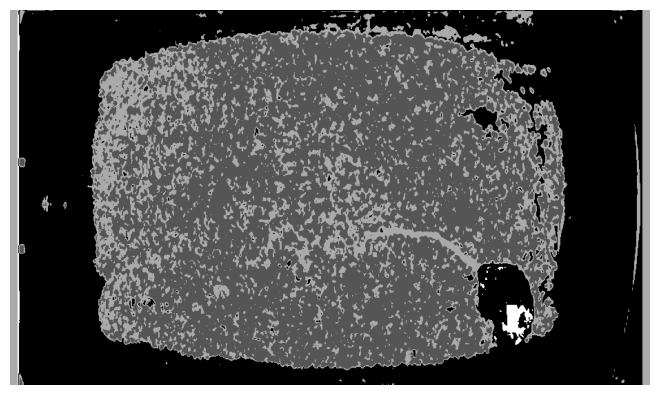

In [12]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result_image, cmap=plt.cm.gray, aspect='equal')
plt.show()

### Floodfill

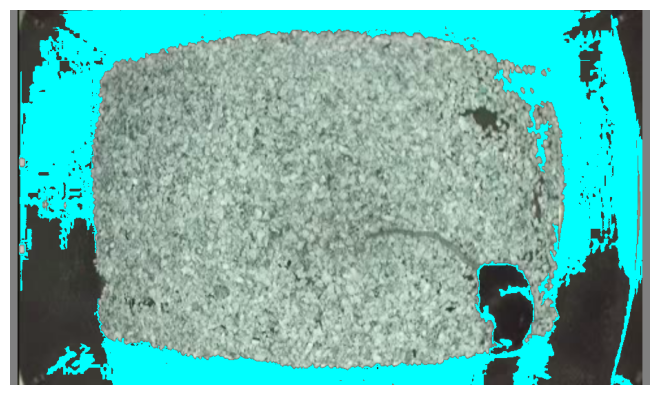

In [13]:
img = cv2.imread(img_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

copyimg = img.copy()
h, w = copyimg.shape[:2]
mask = np.zeros([h + 2, w + 2], np.uint8)

cv2.floodFill(copyimg, mask, (165,60), (0, 255, 255), (50, 20, 50), (50, 50 ,30), cv2.FLOODFILL_FIXED_RANGE)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(copyimg)
plt.show()

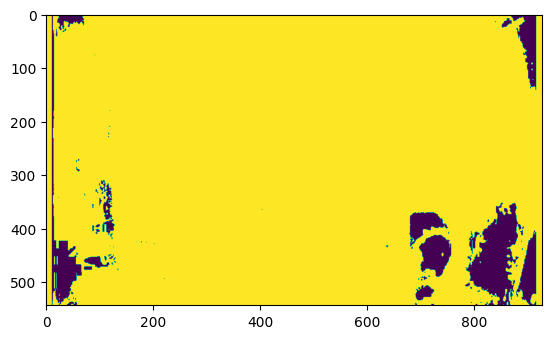

In [14]:
image = cv2.imread(img_name)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_bound = 50
upper_bound = 50

(thresh, BnW_image) = cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY)
im = PIL.Image.fromarray(BnW_image)
plt.imshow(im)
plt.show()

### Зашумление и удаление шумов

#### Гауссов шумов

In [15]:
img = cv2.imread(img_name)
img_gray = img[:,:,1]
noise = np.random.normal(0, 50, img_gray.shape) 
img_noised = img_gray + noise
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)

In [16]:
gauss_noise_test = img_noised

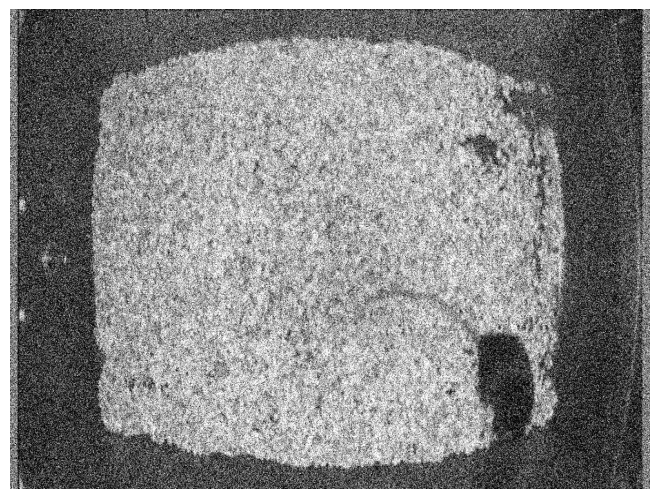

In [17]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("gauss_noise_test.jpg", dpi=300)
plt.show()

#### Импульсный шум

In [18]:
x = np.arange(0, 360, 1)
y = np.sin(np.deg2rad(x))

noise_sample = np.random.default_rng().uniform(0.2*min(y), 0.3*max(y), int(0.03*len(y)))
zeros = np.zeros(len(y) - len(noise_sample))
noise = np.concatenate([noise_sample, zeros])
np.random.shuffle(noise)
y_noised = y + noise

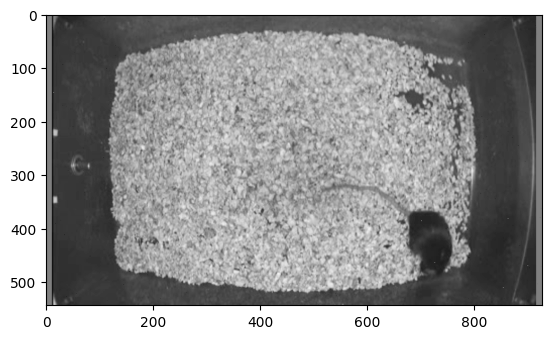

In [19]:
image = cv2.imread(img_name)
 
h, w = image.shape[:2]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

s = 300

noise_sample = np.random.default_rng().uniform(low=200, high=250, size=s)
 
rs1 = np.random.randint(0,gray.size/h-1,s)
rs2 = np.random.randint(0,gray.size/w-1,s)

j = 0

for i in noise_sample:
    gray[rs2[j]][rs1[j]] += i
    j += 1

plt.imshow(gray, cmap=plt.cm.gray, aspect='equal')
plt.savefig("impulse_noise.jpg", dpi=300)
plt.show()

#### Salt-and-Pepper

In [20]:
img_size = img_gray.size
noise_percentage = 0.1
noise_size = int(noise_percentage*img_size)

random_indices = np.random.choice(img_size, noise_size)
img_noised = img_gray.copy()
noise = np.random.choice([img_gray.min(), img_gray.max()], noise_size)
img_noised.flat[random_indices] = noise

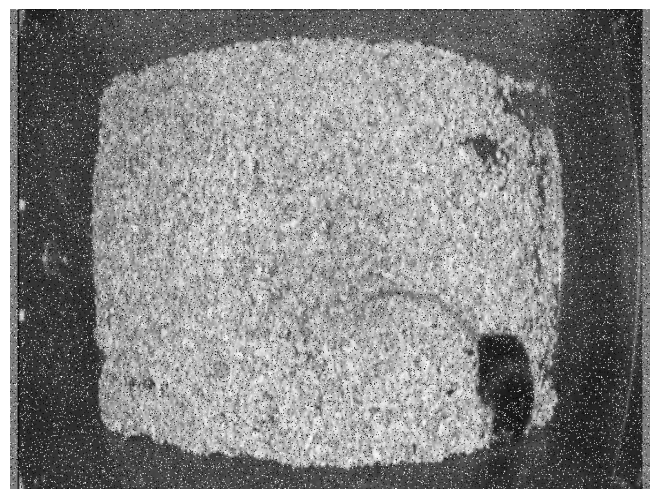

In [21]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("saltnpepper_noise.jpg", dpi=300)
plt.show()

#### Удаление шума из изображения

In [22]:
img = cv2.imread('gauss_noise_test.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 25)

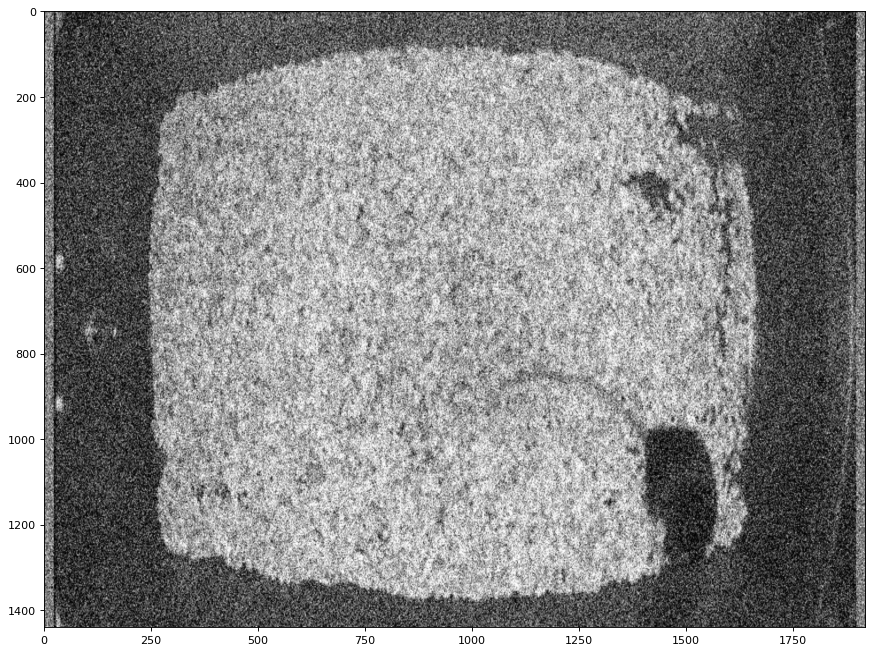

In [23]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(img)
plt.show()

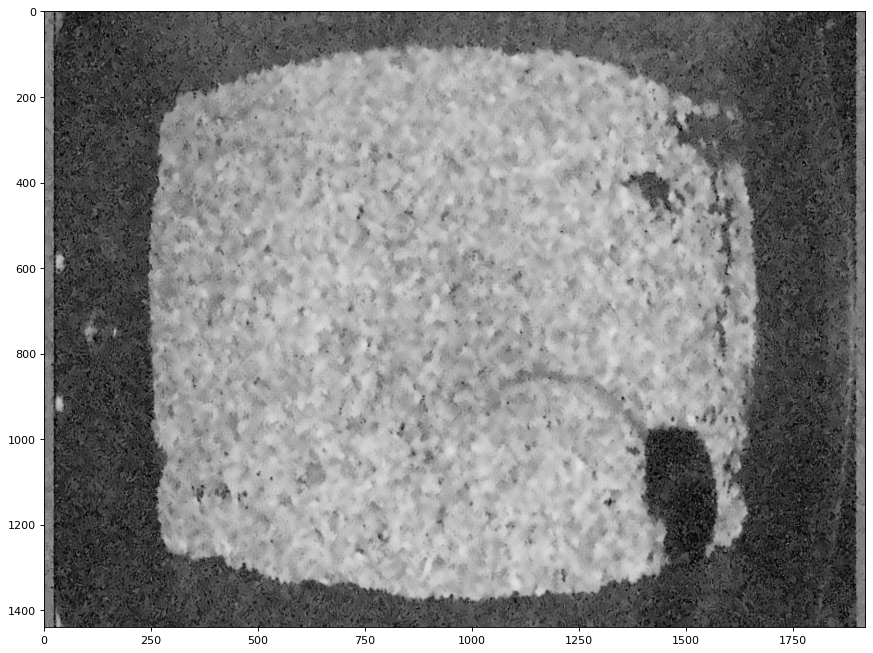

In [24]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(dst)
plt.show()

In [25]:
img = cv2.imread('impulse_noise.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 15, 10, 7, 21)

<Figure size 1200x1200 with 0 Axes>

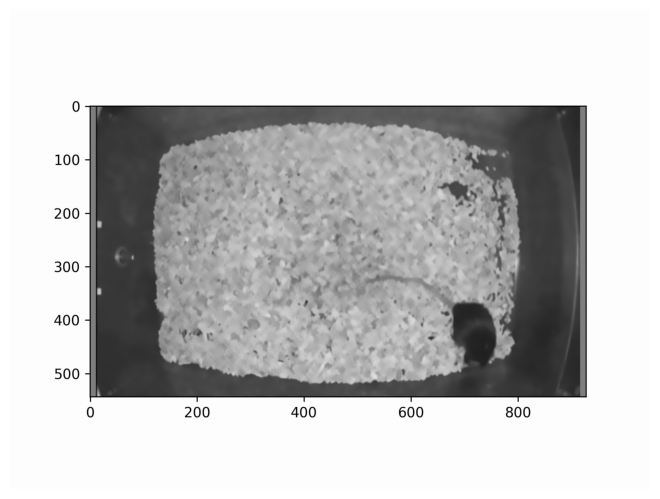

In [26]:
plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(dst[...,::-1] / 255.0, aspect='auto')
plt.savefig("impulse_noise.jpg", dpi=300)
plt.show()

## Классификация

In [16]:
import tensorflow
import torch
import os
import pandas as pd
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
import torch.nn as nn
import torchvision.models as models
import numpy as np
from tqdm import tqdm
import random
from tensorflow import keras

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

csv_file_path = '../../data/clocks.csv'
clocks_csv = pd.read_csv(csv_file_path)

classes_number = clocks_csv['class index'].unique()

class_index_to_label_map = dict(zip(clocks_csv['class index'], clocks_csv['labels']))
classes_number.__len__()

144

In [18]:
def create_dataframes(dataset_type, transforms):
    dataset = []
    df = clocks_csv[clocks_csv['data set'] == dataset_type]
    for index, row in df.iterrows():
        with Image.open(os.path.join('../../data/', row['filepaths'])) as img:
            img_transform = transforms(img)
            label = row['class index']
            dataset.append([img_transform, label])
    return dataset

In [19]:
# train_transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
# ])

val_and_test_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_data = create_dataframes('train', val_and_test_transform)
valid_data = create_dataframes('valid', val_and_test_transform)
test_data = create_dataframes('test', val_and_test_transform)
random.shuffle(train_data)
train_dataset = pd.DataFrame(train_data)
valid_dataset = pd.DataFrame(valid_data)
test_dataset = pd.DataFrame(test_data)

In [20]:
batch_size = 32
epochs = 200
data_augmentation = True
num_classes = 144
lr = 1e-04

subtract_pixel_mean = True
n = 3

depth = n * 9 + 2

model_type = f'ResNet {depth}'

train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size, shuffle=True,
        num_workers=4, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
        valid_dataset,
        batch_size=batch_size, shuffle=False,
        num_workers=4, pin_memory=True)

test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=batch_size, shuffle=False,
        num_workers=4, pin_memory=True)

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


             5_20              5_45              8_30              9_25             12_55             12_10              3_25              9_50


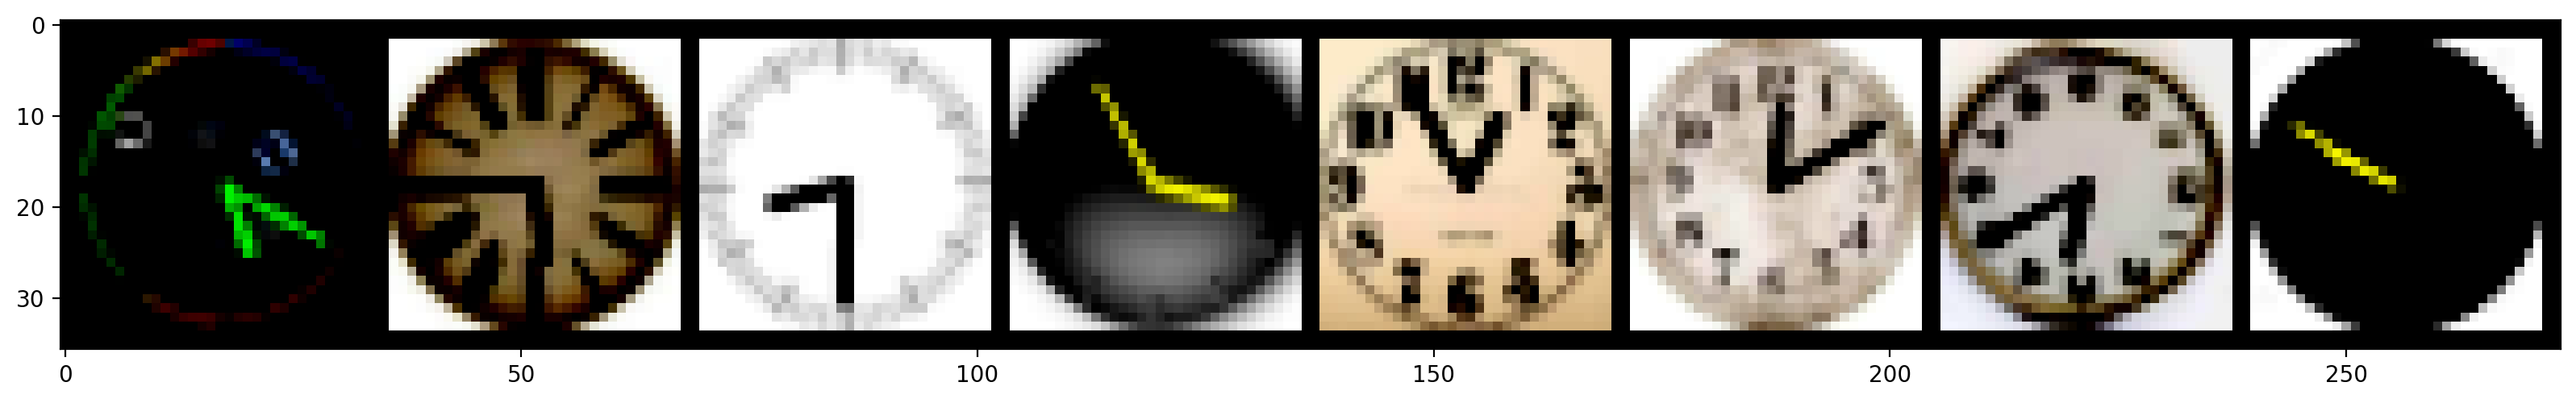

In [22]:
images, labels = list(train_dataset[0].to_numpy()), train_dataset[1].to_numpy()
plt.figure(figsize=(20,10)) 

imshow(torchvision.utils.make_grid(images[:8]))

print(' '.join('%17s' % class_index_to_label_map[list(class_index_to_label_map.keys())[labels[j]]] for j in range(8)))

In [23]:
def split_to_x_y(dataset):
    x_ = []
    y_ = []
    for i in range (len(dataset)):
        x_.append(torch.transpose(dataset[i][0], 0, 2))
        y_.append(dataset[i][1])
    return x_, y_  

In [24]:
x_train, y_train = split_to_x_y(train_dataset.to_numpy())
x_val, y_val = split_to_x_y(valid_dataset.to_numpy())
x_test, y_test =  split_to_x_y(test_dataset.to_numpy())

In [25]:
def to_numpy(data):
    data_ = []
    for i in range(0, len(data)):
        data_ += [np.array(data[i])]
    return np.array(data_)

In [26]:
X_train = to_numpy(x_train)
Y_train = to_numpy(y_train)

X_val = to_numpy(x_val)
Y_val = to_numpy(y_val)

X_test = to_numpy(x_test)
Y_test = to_numpy(y_test)

In [27]:
Y_train = keras.utils.to_categorical(Y_train, 144)
Y_val = keras.utils.to_categorical(Y_val, 144)
Y_test = keras.utils.to_categorical(Y_test, 144)

In [28]:
inputs = keras.Input(shape=(32, 32, 3), name="img")

x = keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = keras.layers.MaxPooling2D(3)(x)

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = keras.layers.add([x, block_1_output])

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x =keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(144, activation='softmax')(x)
model = keras.Model(inputs, outputs, name="toy_resnet")

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(X_train, Y_train, batch_size=64, epochs=60, validation_split=0.2)

Epoch 1/60
144/144 [==============================] - 26s 161ms/step - loss: 4.9719 - accuracy: 0.0068 - val_loss: 4.9716 - val_accuracy: 0.0069
Epoch 2/60
144/144 [==============================] - 23s 158ms/step - loss: 4.7863 - accuracy: 0.0131 - val_loss: 4.3751 - val_accuracy: 0.0156
Epoch 3/60
144/144 [==============================] - 23s 158ms/step - loss: 4.0153 - accuracy: 0.0471 - val_loss: 3.3382 - val_accuracy: 0.1207
Epoch 4/60
144/144 [==============================] - 23s 158ms/step - loss: 3.3332 - accuracy: 0.1094 - val_loss: 2.6886 - val_accuracy: 0.2565
Epoch 5/60
144/144 [==============================] - 23s 158ms/step - loss: 2.5724 - accuracy: 0.2364 - val_loss: 1.7479 - val_accuracy: 0.4913
Epoch 6/60
144/144 [==============================] - 23s 158ms/step - loss: 1.8880 - accuracy: 0.3891 - val_loss: 1.1966 - val_accuracy: 0.6506
Epoch 7/60
144/144 [==============================] - 23s 158ms/step - loss: 1.3931 - accuracy: 0.5317 - val_loss: 0.8080 - val_ac

In [31]:
print(model.evaluate(X_val, Y_val))

45/45 [==============================] - 1s 19ms/step - loss: 0.0971 - accuracy: 0.9715
[0.09707260876893997, 0.9715277552604675]


In [32]:
print(model.evaluate(X_test, Y_test))

45/45 [==============================] - 1s 19ms/step - loss: 0.1119 - accuracy: 0.9736
[0.11189623922109604, 0.9736111164093018]


1/1 [==============================] - 0s 247ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 0
Предсказанный класс 1_00, Реальный класс 1_00


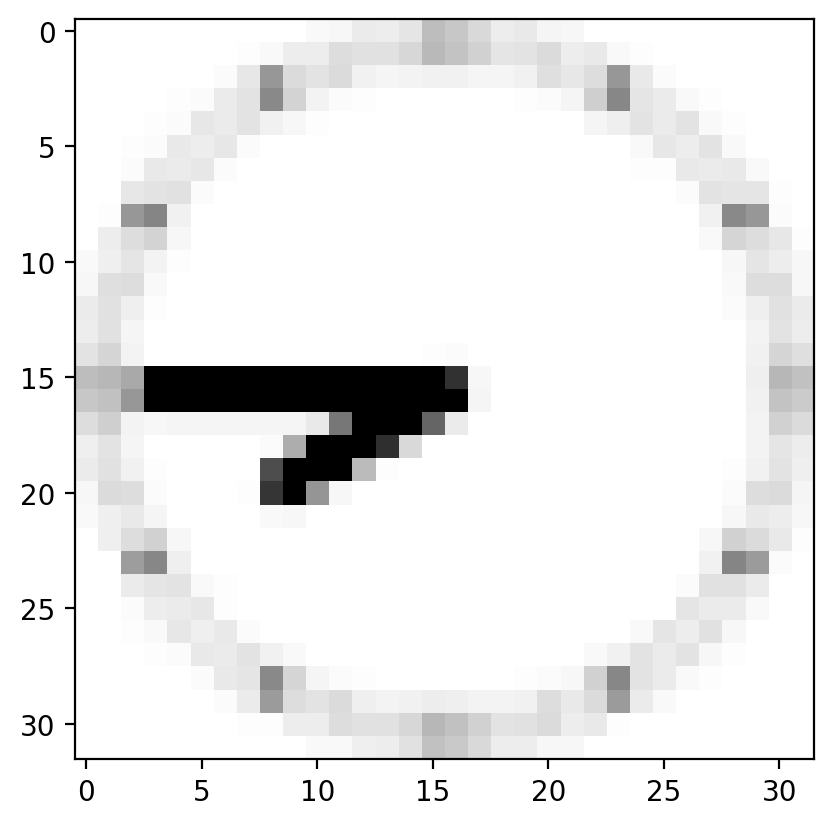

In [33]:
ind = 2
preds = model.predict(np.expand_dims(X_test[ind], axis=0))[0]

pred_class = max(enumerate(preds),key=lambda x: x[1])[0]
real_class = max(enumerate(Y_test[ind]),key=lambda x: x[1])[0]
print(pred_class, real_class)
plt.imshow(X_test[ind])
print(f"Предсказанный класс {class_index_to_label_map[pred_class]}, Реальный класс {class_index_to_label_map[real_class]}")